In [15]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/Users/xinyue/Desktop/Project 2/Outer Western.csv'
df = pd.read_csv(file_path, header=None)  # Read without a header



In [16]:
# Create a new header row with 'Count' and 'Median' labels starting from the third column
new_header = ['Area', 'Suburb']  # Start with 'Area' and 'Suburb' for the first two columns

# Use a loop to dynamically generate 'Count.1', 'Median.1', 'Count.2', 'Median.2', etc.
count_num = 1  # Initialize count number
median_num = 1  # Initialize median number

# Start from the third column
for i in range(2, len(df.columns)):
    if (i - 2) % 4 == 0:  # Every 4th column should be 'Count'
        new_header.append(f'Count.{count_num}')
        count_num += 1
    elif (i - 2) % 4 == 1:  # Every 2nd column after 'Count' should be 'Median'
        new_header.append(f'Median.{median_num}')
        median_num += 1
    elif (i - 2) % 4 == 2:  # Every 2nd column should be 'Count'
        new_header.append(f'Count.{count_num}')
        count_num += 1
    else:  # Remaining columns are 'Median'
        new_header.append(f'Median.{median_num}')
        median_num += 1

# Assign the new header row to the DataFrame columns
df.columns = new_header

# Display the updated DataFrame
print(df)

                       Area                        Suburb Count.1 Median.1  \
0                         0                             1      82       83   
1   Outer Western Melbourne                        Altona   2,873  $320.00   
2                       NaN                     Footscray     935  $290.00   
3                       NaN  Keilor East-Avondale Heights     941  $330.00   
4                       NaN                        Melton   1,497  $250.00   
5                       NaN             Newport-Spotswood     640  $350.00   
6                       NaN           St Albans-Deer Park   1,793  $275.00   
7                       NaN                      Sunshine   1,086  $270.00   
8                       NaN                      Sydenham   1,924  $310.00   
9                       NaN     Werribee-Hoppers Crossing   4,238  $275.00   
10                      NaN                West Footscray     892  $300.00   
11                      NaN                  Williamstown     51

In [17]:
# Filter out the columns that contain 'Median' in their name to get the median rental prices
median_columns = [col for col in df.columns if 'Median' in col]

# Extract only the 'Median' columns along with the 'Suburb' column
median_data = df[['Suburb'] + median_columns].copy()

print(median_data)

                          Suburb Median.1 Median.2 Median.3 Median.4 Median.5  \
0                              1       83       85       87       89       91   
1                         Altona  $320.00  $320.00  $320.00  $325.00  $330.00   
2                      Footscray  $290.00  $300.00  $300.00  $300.00  $300.00   
3   Keilor East-Avondale Heights  $330.00  $330.00  $340.00  $340.00  $340.00   
4                         Melton  $250.00  $250.00  $250.00  $260.00  $260.00   
5              Newport-Spotswood  $350.00  $350.00  $350.00  $360.00  $360.00   
6            St Albans-Deer Park  $275.00  $280.00  $280.00  $280.00  $285.00   
7                       Sunshine  $270.00  $270.00  $280.00  $280.00  $280.00   
8                       Sydenham  $310.00  $320.00  $320.00  $320.00  $330.00   
9      Werribee-Hoppers Crossing  $275.00  $275.00  $280.00  $280.00  $280.00   
10                West Footscray  $300.00  $300.00  $300.00  $300.00  $305.00   
11                  Williams

In [18]:

# Convert each median rental price column to numeric, removing non-numeric characters
for col in median_data.columns:
    if 'Median' in col:
        # Remove any dollar signs or non-numeric characters and convert to numeric
        median_data[col] = pd.to_numeric(median_data[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/var/folders/_s/4j24gf8n0ls5dt1yjm000kbr0000gn/T/ipykernel_71371/2318294063.py:5: SyntaxWarning: invalid escape sequence '\$'
  median_data[col] = pd.to_numeric(median_data[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')


In [19]:
print(median_data)

                          Suburb  Median.1  Median.2  Median.3  Median.4  \
0                              1      83.0      85.0      87.0      89.0   
1                         Altona     320.0     320.0     320.0     325.0   
2                      Footscray     290.0     300.0     300.0     300.0   
3   Keilor East-Avondale Heights     330.0     330.0     340.0     340.0   
4                         Melton     250.0     250.0     250.0     260.0   
5              Newport-Spotswood     350.0     350.0     350.0     360.0   
6            St Albans-Deer Park     275.0     280.0     280.0     280.0   
7                       Sunshine     270.0     270.0     280.0     280.0   
8                       Sydenham     310.0     320.0     320.0     320.0   
9      Werribee-Hoppers Crossing     275.0     275.0     280.0     280.0   
10                West Footscray     300.0     300.0     300.0     300.0   
11                  Williamstown     387.0     380.0     380.0     390.0   
12          

In [20]:
# Round the 'Median' columns to the nearest integer and convert to integer type
for col in median_columns:
    median_data[col] = median_data[col].round().astype('Int64')  # Use 'Int64' to allow for NaN values

# Print the converted data to ensure that all columns have been properly converted
print("Median Data after conversion to integers:")
print(median_data.head())

Median Data after conversion to integers:
                         Suburb  Median.1  Median.2  Median.3  Median.4  \
0                             1        83        85        87        89   
1                        Altona       320       320       320       325   
2                     Footscray       290       300       300       300   
3  Keilor East-Avondale Heights       330       330       340       340   
4                        Melton       250       250       250       260   

   Median.5  Median.6  Median.7  Median.8  Median.9  ...  Median.32  \
0        91        93        95        97        99  ...        145   
1       330       330       330       330       330  ...        390   
2       300       300       310       320       325  ...        370   
3       340       350       350       350       350  ...        400   
4       260       265       270       270       270  ...        320   

   Median.33  Median.34  Median.35  Median.36  Median.37  Median.38  \
0        

Growth trend for 1:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
0      <NA>  2.409639  2.352941  2.298851  2.247191  2.197802  2.150538   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
0  2.105263  2.061856   2.020202  ...    1.37931   1.360544   1.342282   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
0   1.324503    1.30719   1.290323   1.273885   1.257862  16.149068   

   Average Growth Rate (%)  
0                 2.074817  

[1 rows x 42 columns]


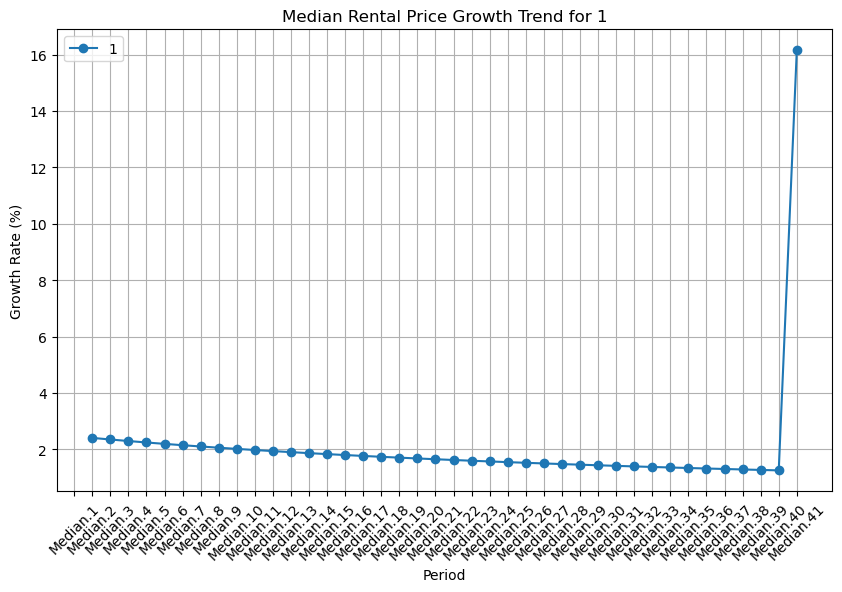

Growth trend for Altona:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
1      <NA>       0.0       0.0    1.5625  1.538462       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
1       0.0       0.0        0.0  ...        0.0   2.564103        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
1        0.0        0.0        0.0        0.0        0.0        7.5   

   Average Growth Rate (%)  
1                 0.751218  

[1 rows x 42 columns]


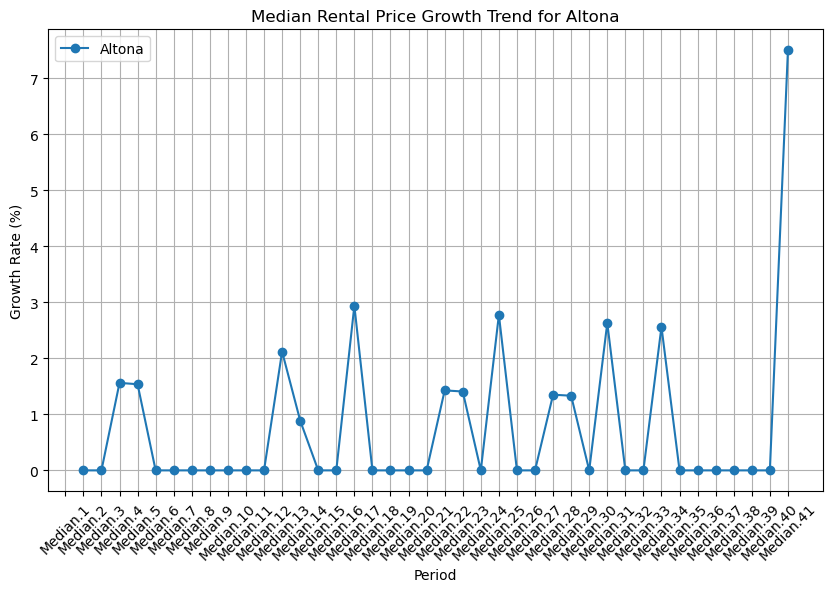

Growth trend for Footscray:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
2      <NA>  3.448276       0.0       0.0       0.0       0.0  3.333333   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
2  3.225806    1.5625  -1.538462  ...  -1.351351   1.369863   1.351351   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
2        0.0   1.333333        0.0        0.0   2.631579   2.564103   

   Average Growth Rate (%)  
2                 0.814907  

[1 rows x 42 columns]


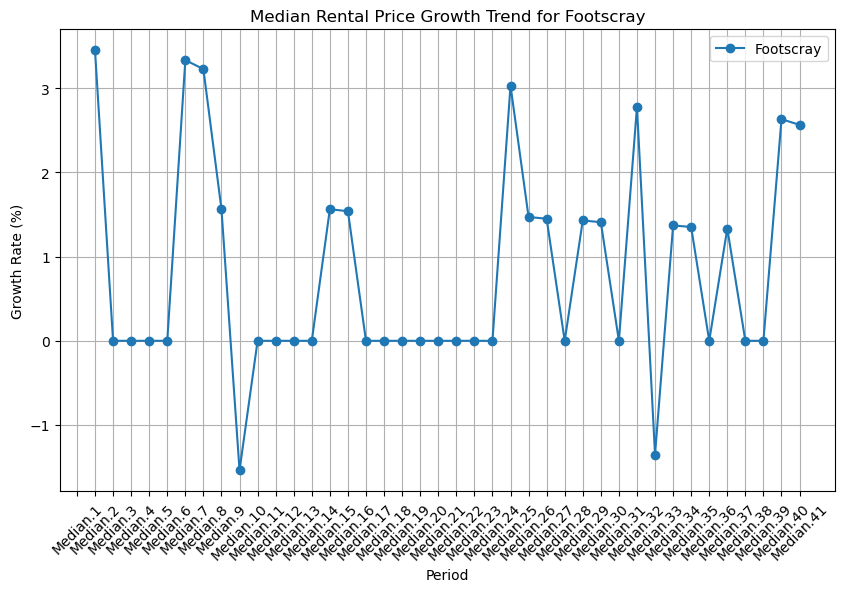

Growth trend for Keilor East-Avondale Heights:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
3      <NA>       0.0  3.030303       0.0       0.0  2.941176       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
3       0.0       0.0        0.0  ...       1.25   1.234568   2.439024   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
3        0.0        0.0        0.0        0.0        0.0   4.761905   

   Average Growth Rate (%)  
3                   0.7279  

[1 rows x 42 columns]


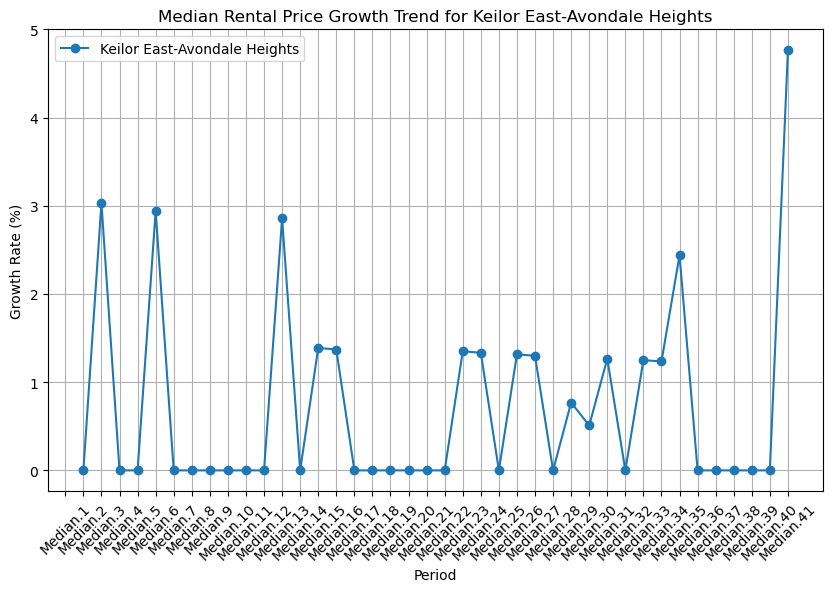

Growth trend for Melton:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
4      <NA>       0.0       0.0       4.0       0.0  1.923077  1.886792   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
4       0.0       0.0        0.0  ...        0.0      3.125        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
4   1.515152   1.492537        0.0        0.0        0.0   8.823529   

   Average Growth Rate (%)  
4                  0.99886  

[1 rows x 42 columns]


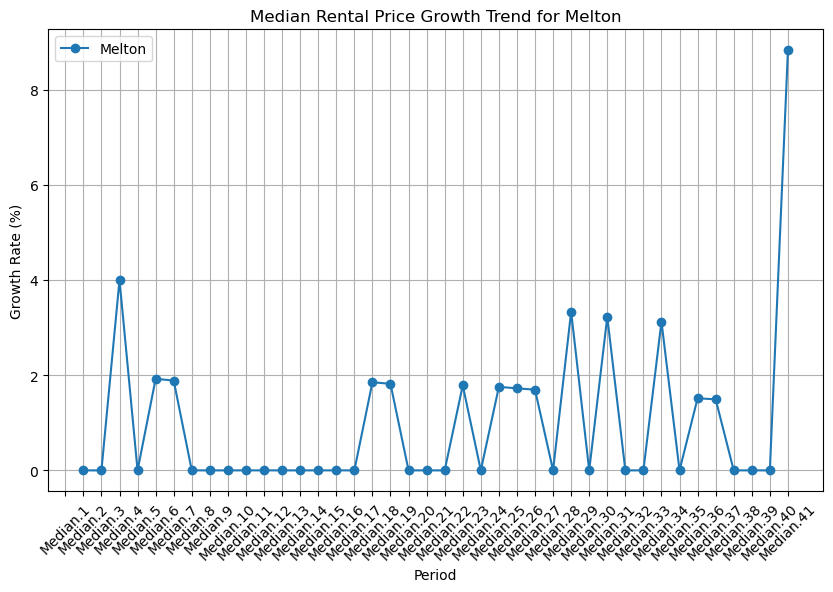

Growth trend for Newport-Spotswood:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
5      <NA>       0.0       0.0  2.857143       0.0       0.0  2.777778   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
5  2.702703  1.578947   1.036269  ...        0.0    1.06383  -1.052632   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
5    2.12766        0.0        0.0      3.125        0.0   5.050505   

   Average Growth Rate (%)  
5                  1.00261  

[1 rows x 42 columns]


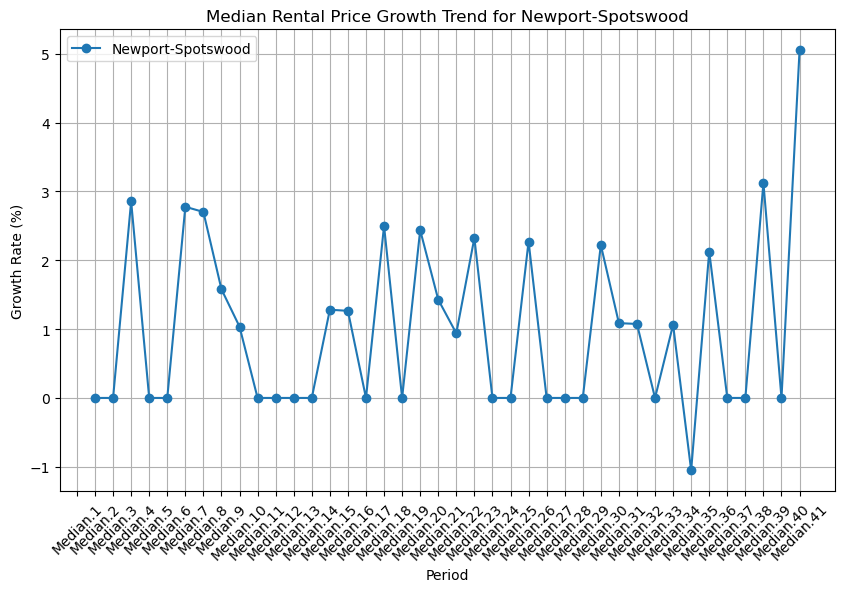

Growth trend for St Albans-Deer Park:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
6      <NA>  1.818182       0.0       0.0  1.785714       0.0  1.754386   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
6       0.0       0.0        0.0  ...   1.470588   1.449275        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
6        0.0        0.0        0.0   1.428571   1.408451   2.777778   

   Average Growth Rate (%)  
6                 0.750096  

[1 rows x 42 columns]


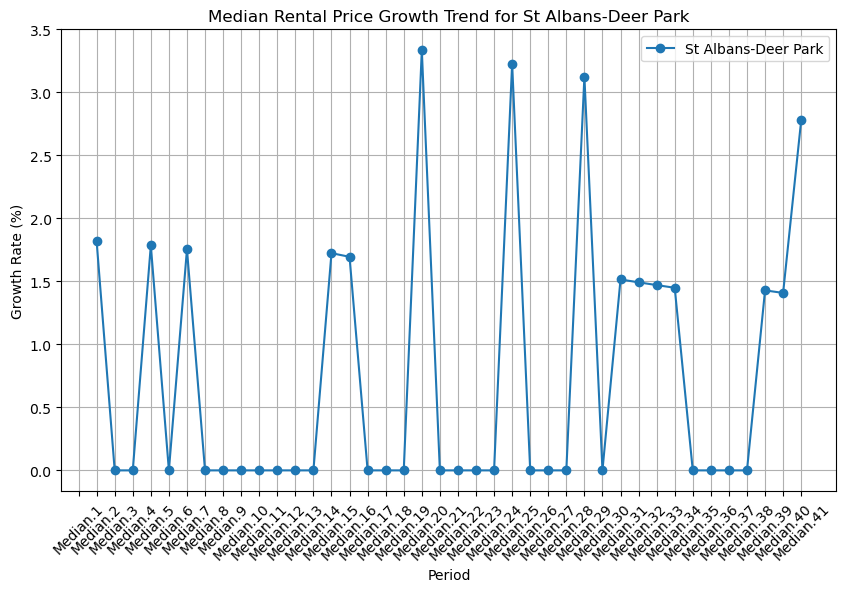

Growth trend for Sunshine:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
7      <NA>       0.0  3.703704       0.0       0.0       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
7       0.0       0.0   1.428571  ...        0.0        0.0   2.941176   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
7        0.0        0.0        0.0   2.857143        0.0   2.777778   

   Average Growth Rate (%)  
7                  0.79833  

[1 rows x 42 columns]


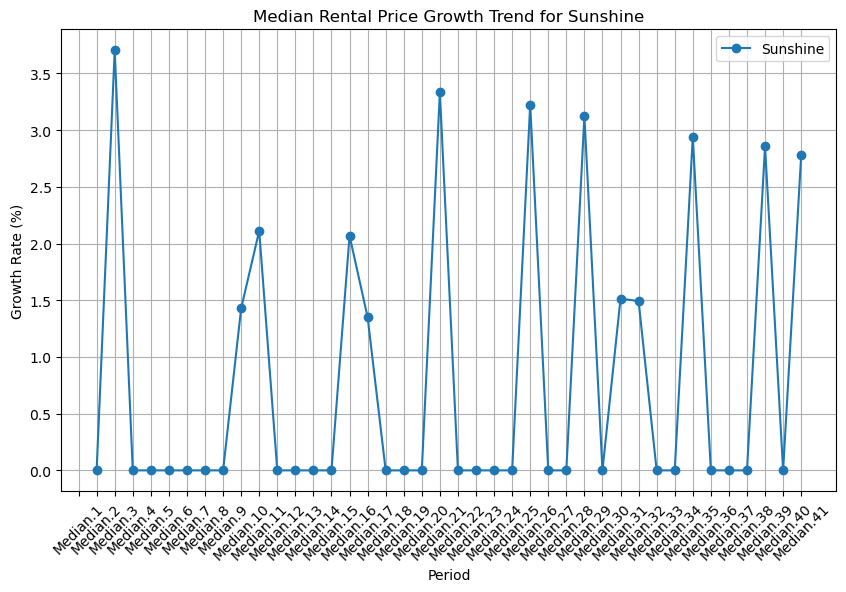

Growth trend for Sydenham:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
8      <NA>  3.225806       0.0       0.0     3.125       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
8       0.0       0.0        0.0  ...        0.0        0.0   2.564103   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
8        0.0        0.0        0.0        0.0        0.0        5.0   

   Average Growth Rate (%)  
8                 0.768862  

[1 rows x 42 columns]


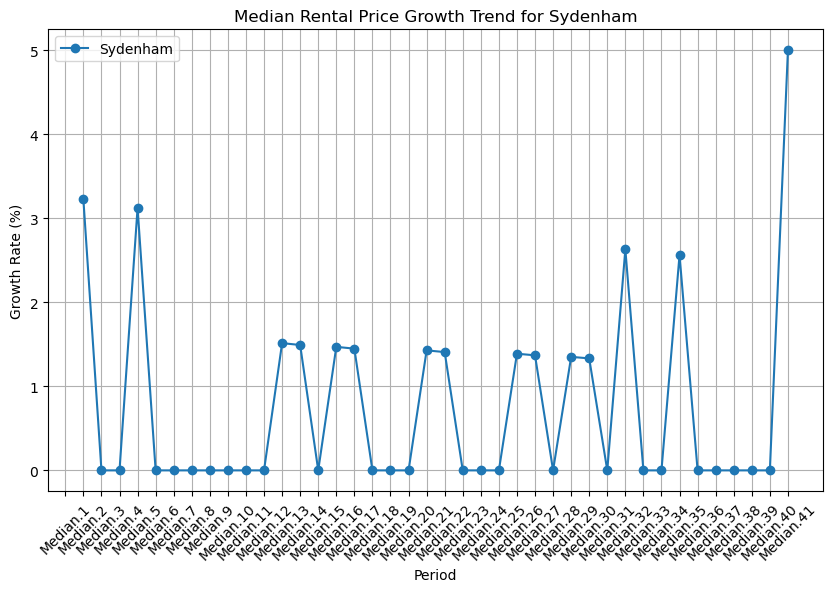

Growth trend for Werribee-Hoppers Crossing:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
9      <NA>       0.0  1.818182       0.0       0.0  1.785714  1.754386   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
9       0.0       0.0        0.0  ...   1.428571   1.408451        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
9   1.388889   1.369863        0.0        0.0        0.0   8.108108   

   Average Growth Rate (%)  
9                 0.951565  

[1 rows x 42 columns]


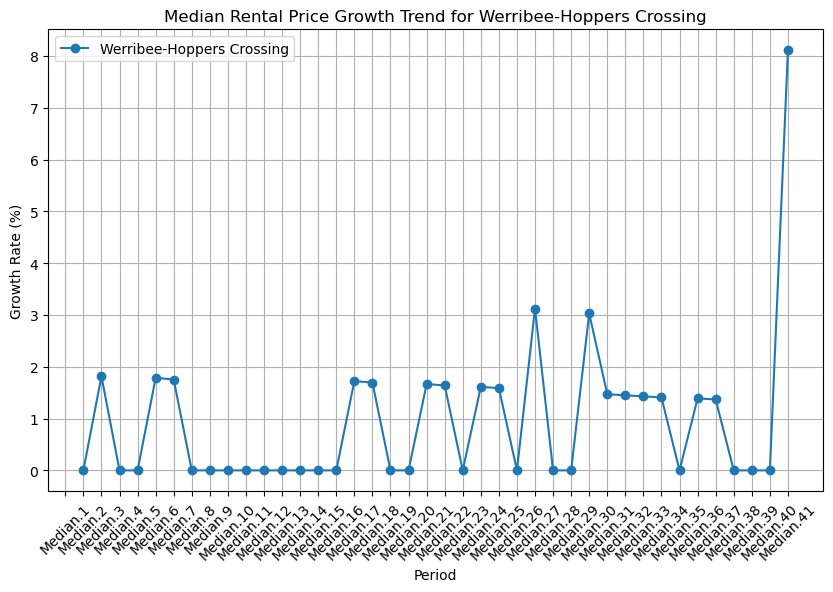

Growth trend for West Footscray:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
10      <NA>       0.0       0.0       0.0  1.666667  1.639344       0.0   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
10       0.0  3.225806        0.0  ...   1.333333        0.0        0.0   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
10   0.789474   1.827676        0.0   2.564103        0.0        5.0   

    Average Growth Rate (%)  
10                 0.853229  

[1 rows x 42 columns]


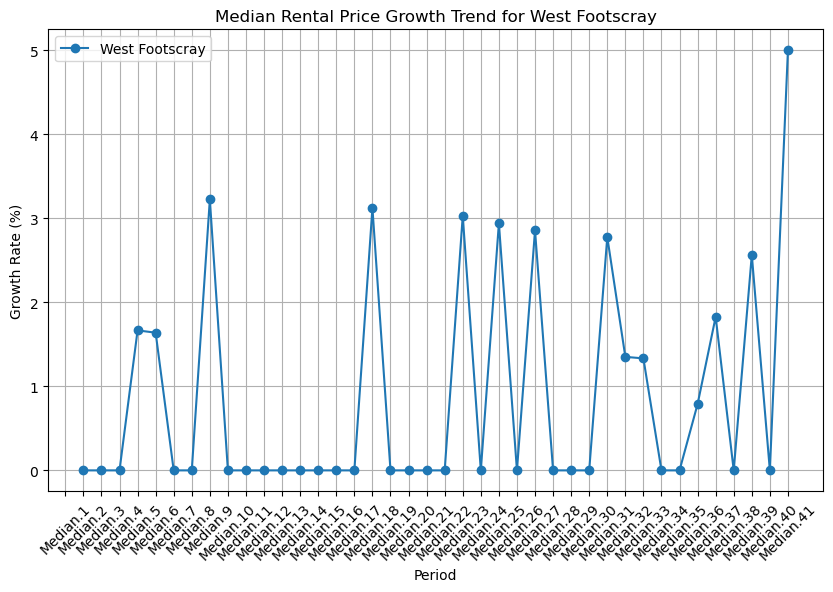

Growth trend for Williamstown:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
11      <NA> -1.808786       0.0  2.631579  2.564103       5.0  2.380952   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
11  4.651163 -4.444444        0.0  ...   2.083333   1.020408   3.030303   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
11   1.960784        0.0  -0.961538  -1.941748   2.970297   5.769231   

    Average Growth Rate (%)  
11                 0.904153  

[1 rows x 42 columns]


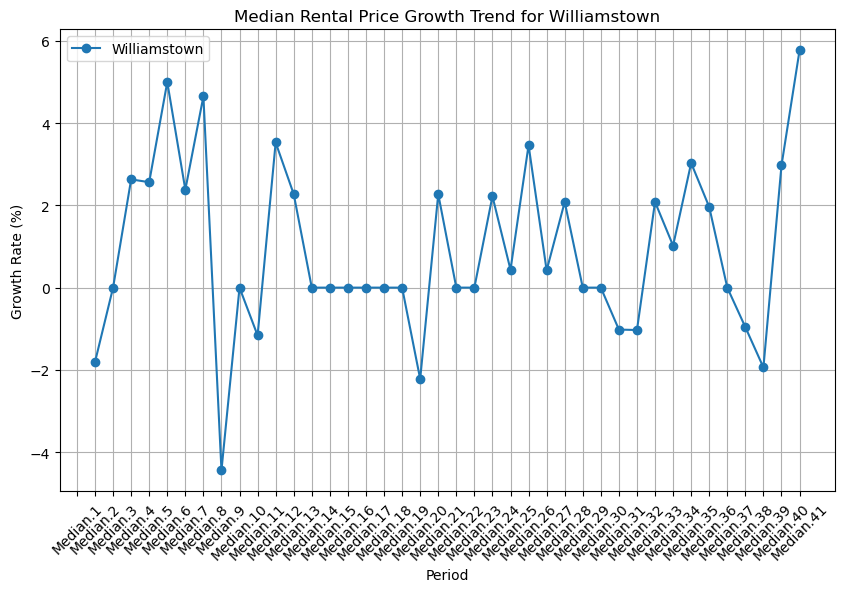

Growth trend for Yarraville-Seddon:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
12      <NA>  2.941176       0.0       0.0       0.0       0.0       0.0   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
12       0.0  2.857143   2.222222  ...   1.098901        0.0   1.086957   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
12   1.075269    2.12766        0.0   2.083333        0.0   2.040816   

    Average Growth Rate (%)  
12                 0.975615  

[1 rows x 42 columns]


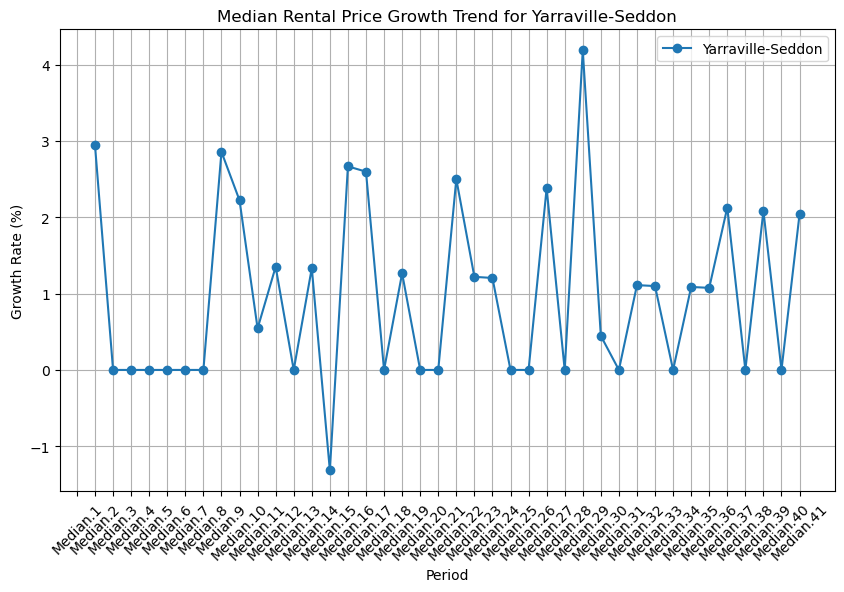

Growth trend for Group Total:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
13      <NA>       0.0  1.724138  1.694915       0.0       0.0       0.0   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
13       0.0       0.0        0.0  ...   1.369863        0.0   2.702703   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
13        0.0        0.0        0.0        0.0        0.0   5.263158   

    Average Growth Rate (%)  
13                 0.814637  

[1 rows x 42 columns]


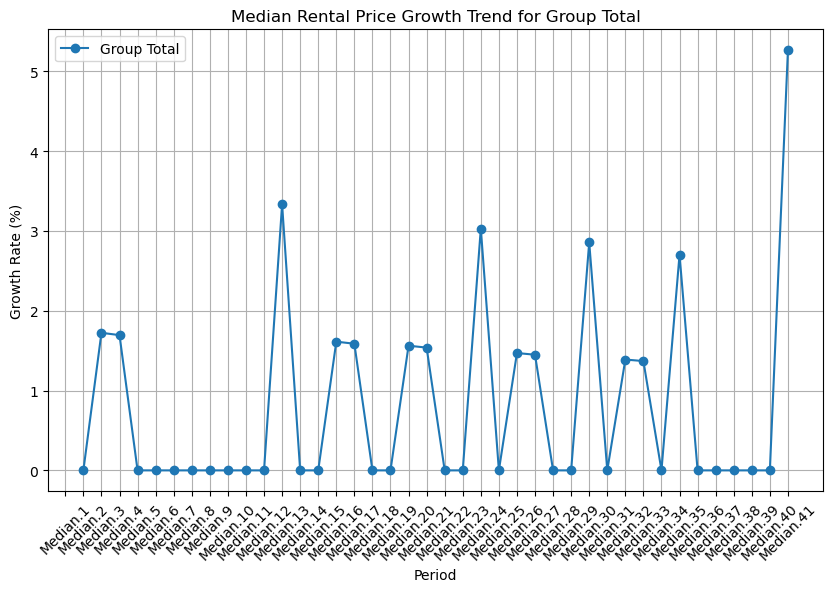

All suburbs growth trends:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
0       <NA>  2.409639  2.352941  2.298851  2.247191  2.197802  2.150538   
1       <NA>       0.0       0.0    1.5625  1.538462       0.0       0.0   
2       <NA>  3.448276       0.0       0.0       0.0       0.0  3.333333   
3       <NA>       0.0  3.030303       0.0       0.0  2.941176       0.0   
4       <NA>       0.0       0.0       4.0       0.0  1.923077  1.886792   
5       <NA>       0.0       0.0  2.857143       0.0       0.0  2.777778   
6       <NA>  1.818182       0.0       0.0  1.785714       0.0  1.754386   
7       <NA>       0.0  3.703704       0.0       0.0       0.0       0.0   
8       <NA>  3.225806       0.0       0.0     3.125       0.0       0.0   
9       <NA>       0.0  1.818182       0.0       0.0  1.785714  1.754386   
10      <NA>       0.0       0.0       0.0  1.666667  1.639344       0.0   
11      <NA> -1.808786       0.0  2.631579  2.564103       5.

In [21]:
import matplotlib.pyplot as plt
# Calculate the growth rate for each suburb separately and plot them
growth_trends = pd.DataFrame()

for suburb in median_data['Suburb'].unique():
    # Filter the data for the specific suburb
    suburb_data = median_data[median_data['Suburb'] == suburb].copy()

    # Calculate the percentage change in the median rental prices across the periods
    suburb_data_growth = suburb_data[median_columns].pct_change(axis='columns') * 100

    # Calculate cumulative growth or average growth as needed (here, taking the mean growth rate)
    suburb_data_growth['Average Growth Rate (%)'] = suburb_data_growth.mean(axis=1)

    # Append the results to the main DataFrame
    growth_trends = pd.concat([growth_trends, suburb_data_growth], ignore_index=True)

    # Print the growth trend for the suburb
    print(f"Growth trend for {suburb}:")
    print(suburb_data_growth)

    # Plotting the growth trend for the current suburb
    plt.figure(figsize=(10, 6))
    plt.plot(suburb_data_growth.columns[:-1], suburb_data_growth.iloc[0, :-1], marker='o', linestyle='-', label=suburb)
    plt.title(f'Median Rental Price Growth Trend for {suburb}')
    plt.xlabel('Period')
    plt.ylabel('Growth Rate (%)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Optional: Print all the growth trends for all suburbs
print("All suburbs growth trends:")
print(growth_trends)